In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/NIR')
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def gaussian_generator(mean, deviation, sample_size):
    data = np.array([np.random.normal(mean,deviation) for x in range(sample_size)])
    return data
def gaussian(x, mu, sigma):
    return math.exp(-0.5*((x-mu)/sigma)**2) / sigma / math.sqrt(2*math.pi)
def create_signal(N):
    len_random_seq = 1
    data = np.array([])
    current_stage = 0
    seq_stages = []
    for _ in range(N):
        if current_stage == 0:
            a = np.random.uniform()
            if a >= 0 and a < 0.9:
                temp = gaussian_generator(0,1,len_random_seq)
                current_stage = 0
            elif a >= 0.90 and a < 0.93 :
                temp = gaussian_generator(5,1,len_random_seq)
                current_stage = 1
            elif a >= 0.93 and a <= 1:
                temp = gaussian_generator(10,1,len_random_seq) 
                current_stage = 2
        elif current_stage == 1:
            a = np.random.uniform()
            if a >= 0 and a <= 0.1:
                temp = gaussian_generator(0,1,len_random_seq)
                current_stage = 0
            elif a > 0.1 and a <= 0.85:
                temp = gaussian_generator(5,1,len_random_seq)
                current_stage = 1
            elif a > 0.85 and a <= 1:
                temp = gaussian_generator(10,1,len_random_seq) 
                current_stage = 2
        else:
            a = np.random.uniform()
            if a >= 0 and a <= 0.05:
                temp = gaussian_generator(0,1,len_random_seq)
                current_stage = 0
            elif a > 0.05 and a <= 0.1:
                temp = gaussian_generator(5,1,len_random_seq)
                current_stage = 1
            elif a > 0.1 and a <= 1:
                temp = gaussian_generator(10,1,len_random_seq) 
                current_stage = 2
            #print(2)
        if len(data) == 0:
            data = temp
        else:
            data = np.append(data,temp)
        seq_stages += [current_stage]
    #print(data.shape)
    return data
def create_simple(N):
    data = np.array([])
    seq_stages = np.zeros((0,),dtype=np.int32)
    for _ in range(10):
        temp = np.array([])
        data_stage_one = gaussian_generator(0, 1, N)
        data_stage_two = gaussian_generator(5,1,N)
        data_stage_three = gaussian_generator(15,3,N)
        temp = np.append(temp,(data_stage_one,data_stage_two,data_stage_three))
        g = np.concatenate((np.ones((N,),dtype=np.int32)-1,np.ones((N,),dtype=np.int32),np.ones((N,),dtype=np.int32)+1,))
        seq_stages = np.hstack((seq_stages,g))
        if len(data) == 0:
            data = temp
        else:
            data = np.append(data,temp)
    return data, seq_stages 

def create_simple_two(N):
    data = np.array([])
    seq_stages = np.zeros((0,), dtype=np.int32)
    for _ in range(10):
        temp = np.array([])
        data_stage_one = gaussian_generator(0, 0.5, N)
        data_stage_two = gaussian_generator(10,3,N)
        temp = np.append(temp,(data_stage_one,data_stage_two))
        g = np.concatenate((np.ones((N,),dtype=np.int32)-1,np.ones((N,),dtype=np.int32)))
        seq_stages = np.hstack((seq_stages,g))
        if len(data) == 0:
            data = temp
        else:
            data = np.append(data,temp)
    #print(seq_stages)
    #print(type(seq_stages[0]))
    return data, seq_stages 
def rename_state(x):
    a = 's'+x
    return a

Исходные размерности  (3000,) (3000,)
Тип x_train элемента: <class 'numpy.float64'>
x_train =  [-0.05368198  0.50351964 -1.70282657]
Тип y элемента <class 'numpy.int32'>
y_train =  [0 0 0]
1.0282573343962191
1.0224430343548743


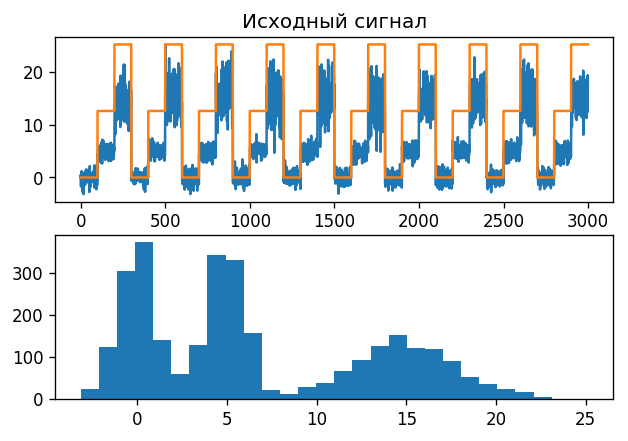

In [5]:
x_train, y_train = create_simple(100)
print('Исходные размерности ',x_train.shape, y_train.shape)
print('Тип x_train элемента:',type(x_train[0]))
# x_train = x_train.reshape(-1,1)
# y_train = y_train.reshape(-1,1)

#x_train = x_train.tolist()

print('x_train = ',x_train[:3])
print('Тип y элемента',type(y_train[0]))
print('y_train = ',y_train[:3])
fig, ax  = plt.subplots(2,1,dpi = 120)
ax[0].set_title('Исходный сигнал')
ax[0].plot(x_train)
ax[0].plot(y_train*((x_train.max() - y_train.min())/2))
ax[1].hist(x_train,bins = int(np.log(len(x_train))+20));
print(x_train[y_train == 0].std())
print(x_train[y_train == 1].std())

In [6]:
y_train = list(map(str,y_train))
y_train = list(map(rename_state, y_train))
print(y_train[:5])
print(type(y_train[0]))
print(np.unique(np.array(y_train)))

['s0', 's0', 's0', 's0', 's0']
<class 'str'>
['s0' 's1' 's2']


In [7]:
N = len(np.unique(np.array(y_train)))
print(N)
print(type([x_train]))
hmm = HiddenMarkovModel.from_samples(NormalDistribution,N,[x_train],labels = [y_train], algorithm = 'labeled',verbose=True)
print(hmm)
print(hmm.dense_transition_matrix())

3
<class 'list'>
[1] Improvement: 2828.8913306630166	Time (s): 0.004297
[2] Improvement: 0.0	Time (s): 0.003583
Total Training Improvement: 2828.8913306630166
Total Training Time (s): 0.0156
None:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            0.09827663493494343,
            1.7316749685777306
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            4.871558793812395,
            1.154006739922302
        ],
        "frozen" : false
    },
    "name" : "s1",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            14.795219114362071,
            3.1479586429545523
        ],
   

{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            0.09827663493494343,
            1.7316749685777306
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
} {
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            0.09827663493494343,
            1.7316749685777306
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]]
Матрица переходов А:
[[nan nan nan]
 [nan nan nan]
 [ 0.  0.  1.]]


/home/kirill/.conda/envs/nir/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


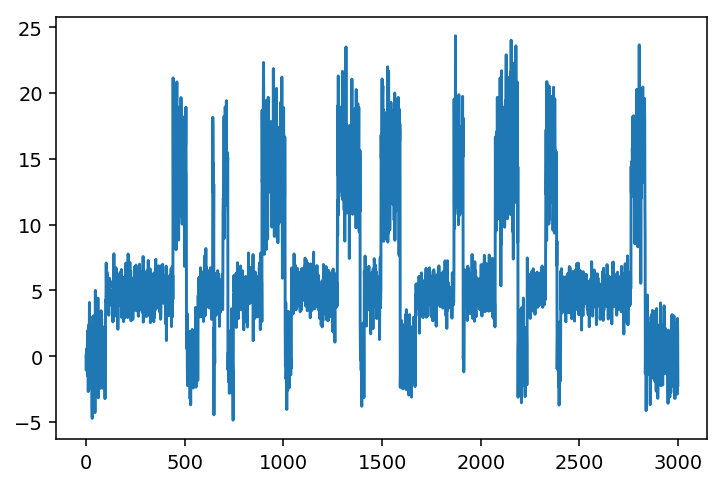

In [61]:
sample, path = hmm.sample( 100000, path=True )

trans = np.zeros((N,N))
p = []
for state, n_state in zip( path[1:-2], path[2:-1] ):
    print(n_state,state)
    state_name = int( state.name[1:] )-1
    n_state_name = int( n_state.name[1:] )-1
    p+=[n_state_name]
    trans[ state_name, n_state_name ] += 1
    break
print(trans)
trans = (trans.T / trans.sum( axis=1 )).T
print('Матрица переходов А:')
print (trans)
plt.figure(dpi=140)
plt.plot(sample[:3000])
plt.plot(p[:3000])

In [9]:
print(hmm.log_probability(x_train*4))
print(hmm.log_probability(x_train))

-119123.88344118012
-5785.099094234294


In [10]:
a = np.array([[1, 2, 3],[1, 0, 2], [0, 2, 1]])
print(a.shape)
b = np.array([1,2,0,1])
print(b.shape)
#a = a.reshape(-1,1)
a.shape

(3, 3)
(4,)


(3, 3)

In [11]:
a.dot(b)

ValueError: shapes (3,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [78]:
np.concatenate(a)

array([1, 2, 3, 1, 0, 2, 0, 2, 1])

## Numpy concatenate

In [158]:
a = np.array([0,1,2,3,4,5])
b = np.array([6,7,8,9,10])
c = [[1,2,3,4,5]]
seq = [[1,2,3],[2,2],[2,1],[2,23,12,2],[2,1,1]]
np.concatenate((a,a))

array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5])

In [159]:
np.concatenate((a,b))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [160]:
m1 = np.concatenate((c,c))
np.concatenate((c,c))

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [161]:
np.concatenate(a)

ValueError: zero-dimensional arrays cannot be concatenated

In [162]:
np.concatenate([a])

array([0, 1, 2, 3, 4, 5])

In [163]:
print(m1.ndim)
if (m1.ndim == 1):
    m1 = m1.reshape(m1.shape[0], 1)
print(m1.shape)

2
(2, 5)


In [164]:
m1 = np.concatenate(seq)
if (m1.ndim == 1):
    m1 = m1.reshape(m1.shape[0], 1)
print(m1.shape)
print(m1)

(14, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 2]
 [23]
 [12]
 [ 2]
 [ 2]
 [ 1]
 [ 1]]


In [42]:
a = []
a.append([0,0,1])
a.append([0,2,1])

In [43]:
a

[[0, 0, 1], [0, 2, 1]]

In [44]:
a

[[0, 0, 1], [0, 2, 1]]

In [45]:
len(a)

2

In [50]:
t = np.random.normal(0,12,10)
t

array([-21.81798659,  -1.20516411, -12.84616728, -24.9181279 ,
        20.68128035,  -1.82732648,  -4.36594423,   4.10477063,
        16.88450814, -15.79398875])

In [51]:
a = []

In [52]:
t = t.tolist()

In [55]:
a = a + t

In [56]:
a

[-21.81798659208659,
 -1.2051641104374449,
 -12.84616727911428,
 -24.9181279000937,
 20.681280348918055,
 -1.8273264789591668,
 -4.365944228049241,
 4.1047706250393405,
 16.88450814185772,
 -15.793988745384803,
 -21.81798659208659,
 -1.2051641104374449,
 -12.84616727911428,
 -24.9181279000937,
 20.681280348918055,
 -1.8273264789591668,
 -4.365944228049241,
 4.1047706250393405,
 16.88450814185772,
 -15.793988745384803]